In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("aircrahesFullDataUpdated_2024.csv")
df.head()


,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


### Data Preparation and Cleaning

In [3]:
df.shape

(5035, 12)

In [4]:
df.size

60420

In [5]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [9]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Year,Day,Ground,Fatalities (air),Aboard
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000
mean,1970.991063,15.785104,1.704469,22.218868,31.107249
std,24.814467,8.794474,55.105115,34.948929,45.740185
min,1908.000000,1.000000,0.000000,0.000000,0.000000
25%,1951.000000,8.000000,0.000000,4.000000,7.000000
50%,1970.000000,16.000000,0.000000,11.000000,16.000000
75%,1992.000000,23.000000,0.000000,25.000000,34.500000
max,2024.000000,31.000000,2750.000000,583.000000,644.000000


In [8]:
df.describe(include="object")

,Quarter,Month,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator
count,5035,5035,4805,5035,5035,5035,4801
unique,4,12,527,633,3525,4170,2631
top,Qtr 4,December,Russia,Douglas,Boeing B 737,Moscow Russia,Aeroflot
freq,1368,497,249,994,73,16,188


In [9]:
df.isna().sum()

Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region           230
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                 234
Ground                     0
Fatalities (air)           0
Aboard                     0
dtype: int64

In [3]:
df = df.sort_values(by = "Year")
df

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
5018,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
4747,1909,Qtr 3,September,7,France?,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2428,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
4853,1913,Qtr 3,September,9,NaN,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20
4292,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship)?,Near Johannisthal Germany,Navy German - Military,0,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...
1667,2024,Qtr 1,January,23,NWT Canada,BAe,BAe 3212 Jetstream,Fort Smith,Northwestern Air Lease LTD,0,6,7
1668,2024,Qtr 1,January,18,Somalia,Fokker,Fokker 505YJWG,Ceel Barde,Jetways Airlines,0,1,4
1666,2024,Qtr 1,January,2,Japan,Airbus,Airbus A350-941/de Havilla DHC,Tokyo,Japan Airlines Japan Coast Guard,0,5,385
3352,2024,Qtr 2,May,21,Myanmar,Boeing,Boeing 777-312ER9V-SWM,Over Irrawaddy Basin,Singapore Airllines,0,1,229


In [4]:
df = df.reset_index(drop=True)
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France?,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,September,9,NaN,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20
4,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship)?,Near Johannisthal Germany,Navy German - Military,0,28,28


In [5]:
df.loc[:,"Country/Region"]=df.loc[:,"Country/Region"].str.replace("'-",'').str.replace("?",'').str.replace("10","None").str.replace("100","None").str.replace("110","None").str.replace("116","None").str.replace("18","None").str.replace("325","None").str.replace("570","None").str.replace("800","None")
df

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,September,9,NaN,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20
4,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship)?,Near Johannisthal Germany,Navy German - Military,0,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...
5030,2024,Qtr 1,January,23,NWT Canada,BAe,BAe 3212 Jetstream,Fort Smith,Northwestern Air Lease LTD,0,6,7
5031,2024,Qtr 1,January,18,Somalia,Fokker,Fokker 505YJWG,Ceel Barde,Jetways Airlines,0,1,4
5032,2024,Qtr 1,January,2,Japan,Airbus,Airbus A350-941/de Havilla DHC,Tokyo,Japan Airlines Japan Coast Guard,0,5,385
5033,2024,Qtr 2,May,21,Myanmar,Boeing,Boeing 777-312ER9V-SWM,Over Irrawaddy Basin,Singapore Airllines,0,1,229


In [6]:
df.loc[:,"Country/Region"]=df.loc[:,"Country/Region"].fillna("None")
df.head()


,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,September,9,None,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20
4,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship)?,Near Johannisthal Germany,Navy German - Military,0,28,28


In [7]:
df.loc[:,"Aircraft Manufacturer"]=df.loc[:,"Aircraft Manufacturer"].str.replace("?",'').str.replace("139","None").str.replace("42","None")
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,September,9,None,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20
4,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship)?,Near Johannisthal Germany,Navy German - Military,0,28,28


In [8]:
df.loc[:,"Aircraft"]=df.loc[:,"Aircraft"].str.replace("?",'')
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible,Dirigible,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,September,9,None,Zeppelin,Zeppelin L 1 (airship),Over the North SeaMilitary - German Navy,NaN,0,14,20
4,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship),Near Johannisthal Germany,Navy German - Military,0,28,28


In [9]:
df.loc[:,"Location"]=df.loc[:,"Location"].str.replace("?",'')
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France,NaN,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible,Dirigible,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,September,9,None,Zeppelin,Zeppelin L 1 (airship),Over the North SeaMilitary - German Navy,NaN,0,14,20
4,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship),Near Johannisthal Germany,Navy German - Military,0,28,28


In [10]:
df.loc[:,"Operator"]=df.loc[:,"Operator"].fillna("None")
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France,None,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible,Dirigible,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,September,9,None,Zeppelin,Zeppelin L 1 (airship),Over the North SeaMilitary - German Navy,None,0,14,20
4,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship),Near Johannisthal Germany,Navy German - Military,0,28,28


In [11]:
df.isna().sum()

Year                     0
Quarter                  0
Month                    0
Day                      0
Country/Region           0
Aircraft Manufacturer    0
Aircraft                 0
Location                 0
Operator                 0
Ground                   0
Fatalities (air)         0
Aboard                   0
dtype: int64

### Research Questions

##### 1. HOW MANY PEOPLE SURVIVED IN THE LAST 20 YEARS?
##### 2. HOW MANY PEOPLE DIED IN THE LAST 20 YEARS?
##### 3. WHICH COUNTRY/REGION HAS THE HIGHEST NUMBER OF AIRCRASHES?
##### 4. WHERE ARE THE TOP 10 MOST COMMON LOCATION?
##### 5. WHICH MONTH HAS THE HIGHEST NUMBER OF CRASHES?
##### 6. WHO ARE THE TOP 10 OPERATORS?
##### 7. WHO ARE THE TOP 10 AIRCRAFT MANUFACTURER?

In [14]:
### HOW MANY PEOPLE SURVIVED IN THE LAST 20 YEARS?
Survival = df["Aboard"]- df["Fatalities (air)"]
Survival

0         1
1         0
2         0
3         6
4         0
       ... 
5030      1
5031      3
5032    380
5033    228
5034      0
Length: 5035, dtype: int64

In [15]:
df.loc[:,"Survival"] = Survival

In [16]:
### HOW MANY PEOPLE SURVIVED IN THE LAST 20 YEARS?

survived_cases = df.groupby(df["Year"])["Survival"].sum().reset_index()

In [17]:
last_20 = survived_cases.sort_values(by="Year",ascending=True).tail(20)

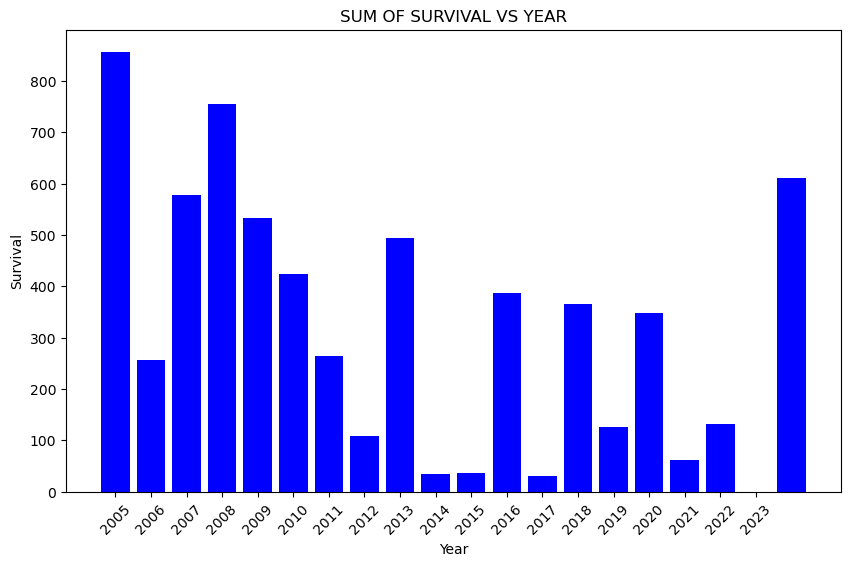

In [18]:

plt.figure(figsize=(10,6))
plt.bar(last_20["Year"], last_20["Survival"],
         color ="blue")
plt.xticks(np.arange(2005,2024), rotation=45)
plt.xlabel("Year")
plt.ylabel("Survival")
plt.title("SUM OF SURVIVAL VS YEAR")
plt.gca().xaxis.set_ticklabels([
    str(int(x)) for x in 
    plt.gca().xaxis.get_ticklocs()])

plt.show()

In [19]:
### 2. HOW MANY PEOPLE DIED IN THE LAST 20 YEARS?

dead_cases = df.groupby(df["Year"])["Fatalities (air)"].sum().reset_index()

In [20]:
last_20_dead = dead_cases.sort_values(by="Year",ascending=True).tail(20)

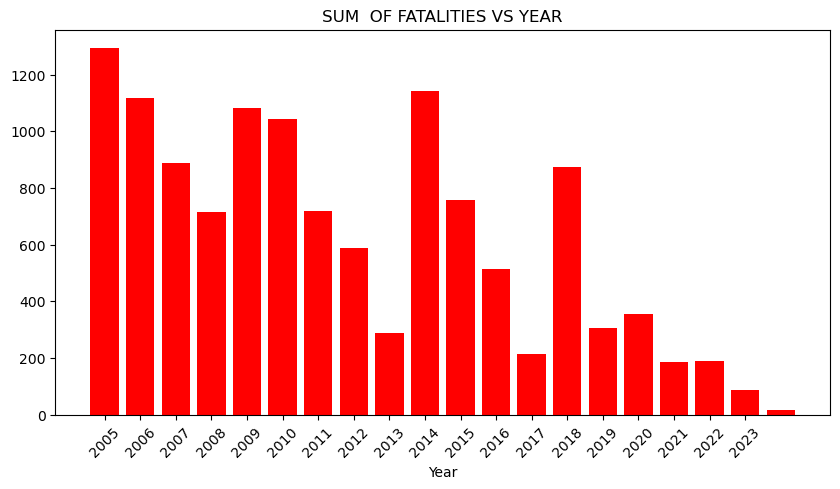

In [21]:
plt.figure(figsize=(10,5))
plt.bar(last_20_dead["Year"], last_20_dead["Fatalities (air)"],
         color ="red")
plt.xticks(np.arange(2005,2024),rotation=45)
plt.xlabel("Year")
plt.title("SUM  OF FATALITIES VS YEAR")
plt.gca().xaxis.set_ticklabels([
    str(int(x)) for x in 
    plt.gca().xaxis.get_ticklocs()])

plt.show()

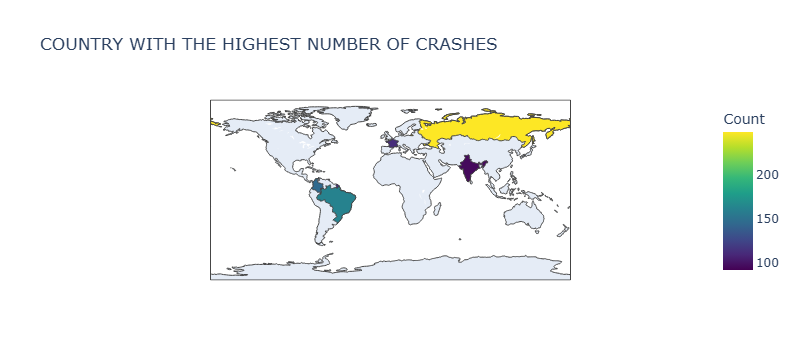

In [25]:
### 3. WHICH COUNTRY/Region HAS THE HIGHEST NUMBER OF AIRCRASHES?

country_counts= df["Country/Region"].value_counts().reset_index().head(10)
country_counts.columns = ["Country/Region", "Count"]

fig= px.choropleth(country_counts,locations="Country/Region",
                   locationmode="country names",
                   color="Count",
                   color_continuous_scale="Viridis",
                   title= "COUNTRY WITH THE HIGHEST NUMBER OF CRASHES")
fig.show()

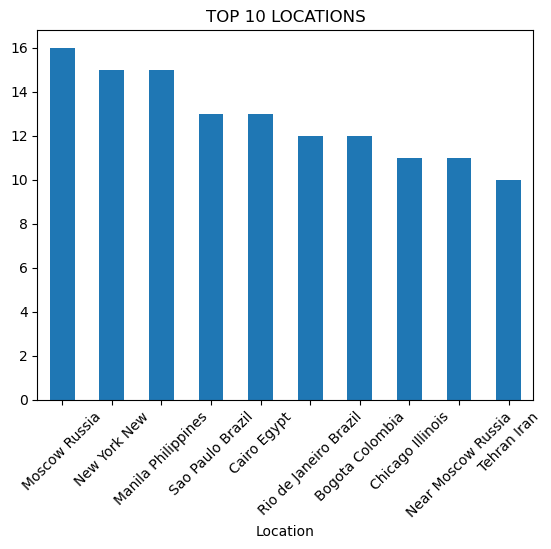

In [23]:
### 4. WHERE ARE THE TOP 10 MOST COMMON LOCATION?

top_10 = df.Location.value_counts().head(10)
top_10.plot(kind = "bar")
plt.xticks(rotation=45)
plt.title("TOP 10 LOCATIONS")
plt.show()

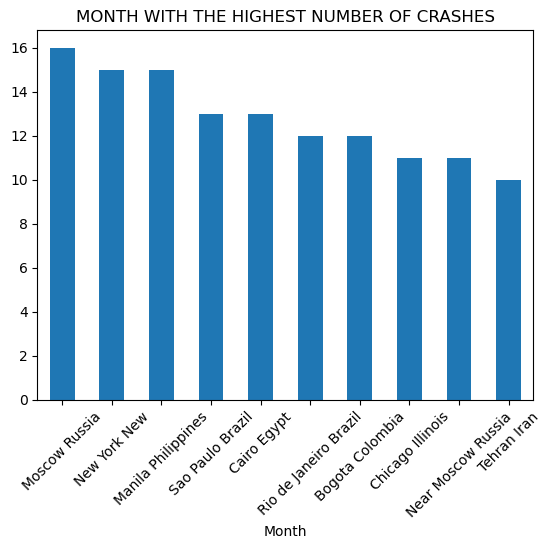

In [23]:
##### 5. WHICH MONTH HAS THE HIGHEST NUMBER OF CRASHES?
top_10 = df.Location.value_counts().head(10)
top_10.plot(kind = "bar")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.title("MONTH WITH THE HIGHEST NUMBER OF CRASHES")


plt.show()

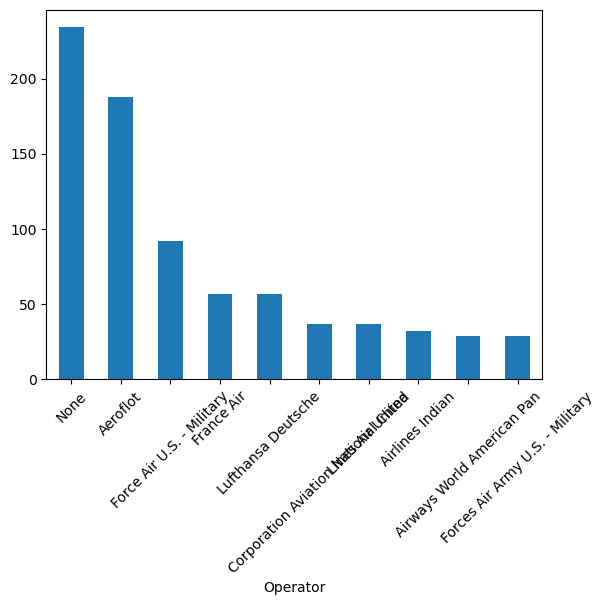

In [24]:
### 6. WHO ARE THE TOP 10 OPERATORS?


top_10 = df.Operator.value_counts().head(10)
top_10.plot(kind = "bar")
plt.xticks(rotation=45)
plt.show()

### KEY FINDINGS

1. HOW MANY PEOPLE SURVIVED IN THE LAST 20 YEARS?

The analysis shows that there has been fluctuation in the number of survivors in the last 20 years with some year higher than the other. i noticed that 2005 has the highest number of survivors with 857 these might be due to several incidents with successful emergency responses and effective safety measures. i also noticed that 2023 do not have any survival this might be due to poor response and outdated infrastructure

2.HOW MANY PEOPLE DIED IN THE LAST 20 YEARS?

The analysis shows that in the last 20 year there have being fluctuation in the rate of fatalities with some years having high fatalities rate  than the other. i also  noticed that in the last 3years  from 2022 to 2024 the rate of fatalities have reduced from 186 incidents in 2022 to 15 incidents in 2024 this might be due to technology advancement and public awareness.

3. WHICH COUNTRY/REGION HAS THE HIGHEST NUMBER OF AIRCRASHES?

The country with the highest number of crashes is Russia with 249 number of crashes this might be due to harsh weather conditions, vast geographical coverage, aging aircraft fleets and operational challenges in Russia

4. WHERE ARE THE TOP 10 MOST COMMON LOCATION?

The analysis shows that the top 10 location associated with air crashes as Moscow Russia with 16 number of crashes, New York New with 15 incidents, Manila philiphines with 15 incidents, Sao paulo Brazil with 13 incidents, Cairo Egypt with 13 incidents, Rio de janeiro Brazilwith 12 incidents, Bogota Colombia with 12 incidents, Chicago illinois with 11 incidents, Near Moscow russia with 11 incidents, Tehra iran with 10 incidents  this might be due to outdated infrastructures, insufficient safety measures and adverse weather conditions.

5. WHICH MONTH HAS THE HIGHEST NUMBER OF CRASHES?

The analysis shows that December has the highest number of crashes with 497 number of crashes this might be due to Harsh winter weather conditions and limited light day during the winter months which can affect flight operations and safety

6. WHO ARE THE TOP 10 OPERATORS?

The operator with the highest number of air crashes is None, Aeroflot and force Air US military with 234, 188 and 92 number of air crashes. None operators having the highest number of crashes these might be due to lack of proper documentation.  Aeroflot is one of the major Russian airlines with high number of crashes these might be could be due to the airline's long operational history, the high volume of flights, and historical safety practices during certain periods of the airline's history.

## RECOMMENDATION

- Continuously improved safety measures and protocols to reduce the number of fatalities.
- Invest in advance safety technologies such as better crash resistant design. Enhanced emergency equipment and improve communication rates.
- Increase public awareness and provide training on safety procedures for passengers.
- Upgrading airport infrastructures in the top 10 locations to handle high volume of traffic and challenging conditions more effectively.
- Strengthen aviation safety policies and regulations in high-risk areas, implement stricter zoning laws to reduce risks and enforce compliance with international safety standards.
- Upgrading airport infrastructures in the country to handle high volume of traffic and challenging conditions more effectively.
- Implement advanced weather monitoring and forecasting system to provide accurate and timely weather information to pilots and air traffic controllers especially during high-risk winter month.
- Schedule more frequent and rigorous maintenance checks during winter months to ensure that aircraft are in optimal condition to handle adverse condition.
